In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

In [4]:
#printing the first 5 rows
df=pd.read_csv('../input/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
#checking for null values in the dataset
df.isnull().sum()
#No null values in the dataset

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
#datatypes of all the fields in the dataset
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [7]:
correlation_df = df.corr()
# The below correlation coefficients is NaN for Employee Count and Standard Hours Fields
#This may be because of the zero variance in those fields
employee_count_var = df["EmployeeCount"].var() #this is 0
standard_hours_var = df["StandardHours"].var() #this is 0

In [8]:
#Hence we drop these 2 rows
new_df = df.drop(["EmployeeCount","StandardHours"],axis = 1)

In [9]:
new_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,1,6,3,3,2,2,2,2


In [10]:
correlation_new_df = new_df.corr()
correlation_new_df

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,-0.014829,0.012648,-0.001251,-0.012944,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.046247,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,0.000644,-0.055699,0.020002,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656


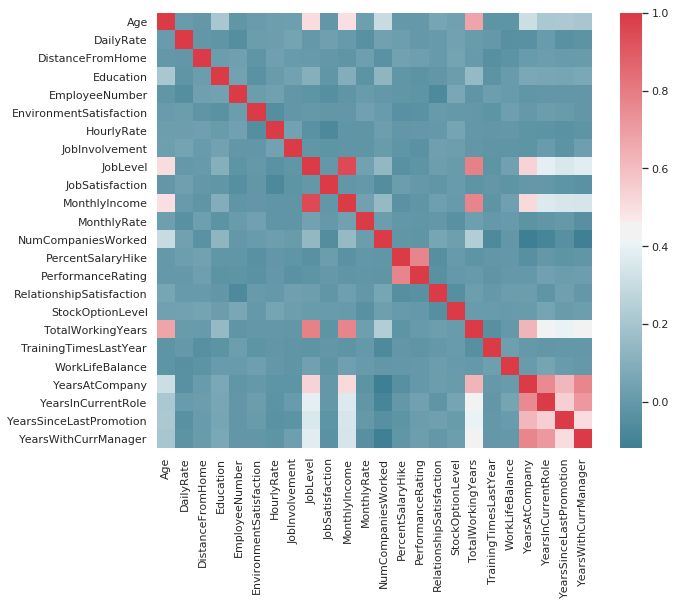

In [11]:
#The above given matrix can also be drawn on MatplotLib for better visual Interpretation

sns.set()
f, ax = plt.subplots(figsize=(10, 8))
corr = new_df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

Now from the above plot, we can see that YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion and YearsWtihCurrManager
are closely related, Hence we drop those columns.
Also, we'll drop the following rows based on their High Correlation coefficient from the plot:
1. TotalWorkingYears
2. PercentSalaryHike
3. PerformanceRating
4. NumCompaniesWorked
5. MonthlyIncome




In [12]:
#After removing the strongly correlated variables
df_numerical = new_df[['Age','DailyRate','DistanceFromHome','Education',
                       'EnvironmentSatisfaction', 'HourlyRate',                     
                       'JobInvolvement', 'JobLevel','MonthlyRate',
                       'JobSatisfaction',
                       'RelationshipSatisfaction', 
                       'StockOptionLevel',
                        'TrainingTimesLastYear','WorkLifeBalance']].copy()
df_numerical.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,MonthlyRate,JobSatisfaction,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance
0,41,1102,1,2,2,94,3,2,19479,4,1,0,0,1
1,49,279,8,1,3,61,2,2,24907,2,4,1,3,3
2,37,1373,2,2,4,92,2,1,2396,3,2,0,3,3
3,33,1392,3,4,4,56,3,1,23159,3,3,0,3,3
4,27,591,2,1,1,40,3,1,16632,2,4,1,3,3


Now we can scale our numerical features either by StandardScaler or by using math operations


In [13]:
df_numerical = abs(df_numerical - df_numerical.mean())/df_numerical.std()  
df_numerical.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,MonthlyRate,JobSatisfaction,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance
0,0.446199,0.742274,1.010565,0.891385,0.660306,1.382668,0.379543,0.057768,0.725773,1.152861,1.583639,0.931697,2.171243,2.492972
1,1.321915,1.297333,0.147100,1.867790,0.254538,0.240595,1.025818,0.057768,1.488370,0.660628,1.191033,0.241906,0.155654,0.337981
2,0.008340,1.413882,0.887213,0.891385,1.169383,1.284288,1.025818,0.961159,1.674271,0.246116,0.658749,0.931697,0.155654,0.337981
3,0.429518,1.460969,0.763861,1.061426,1.169383,0.486544,0.379543,0.961159,1.242788,0.246116,0.266142,0.931697,0.155654,0.337981
4,1.086306,0.524116,0.887213,1.867790,1.575150,1.273580,0.379543,0.961159,0.325789,0.660628,1.191033,0.241906,0.155654,0.337981


As we have got our numerical data set up for modelling, We need to do the same for the categorical data.
We create dummies for the categorical data and remove any redundant rows.

In [14]:
df_categorical = new_df[['Attrition', 'BusinessTravel','Department',
                       'EducationField','Gender','JobRole',
                       'MaritalStatus',
                       'Over18', 'OverTime']].copy()
df_categorical.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [15]:
df_categorical["Over18"].value_counts()
#Since all values are Y, we can drop this column

Y    1470
Name: Over18, dtype: int64

In [16]:
df_categorical = df_categorical.drop(["Over18"],axis = 1)

In [17]:
# We now Label Encode the Attrition data 
lbl = LabelEncoder()
lbl.fit(['Yes','No'])
df_categorical["Attrition"] = lbl.transform(df_categorical["Attrition"])
df_categorical.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,1,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,0,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,1,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,0,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,0,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


In [18]:
# We create dummies for the remaining categorical variables

df_categorical = pd.get_dummies(df_categorical)
df_categorical.head()

,Attrition,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0


In [19]:
#Now we finally join both the numerical and categorical dataframes for model evaluation

final_df = pd.concat([df_numerical,df_categorical], axis= 1)
final_df.head()


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,MonthlyRate,JobSatisfaction,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,Attrition,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0.446199,0.742274,1.010565,0.891385,0.660306,1.382668,0.379543,0.057768,0.725773,1.152861,1.583639,0.931697,2.171243,2.492972,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,1.321915,1.297333,0.147100,1.867790,0.254538,0.240595,1.025818,0.057768,1.488370,0.660628,1.191033,0.241906,0.155654,0.337981,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,0.008340,1.413882,0.887213,0.891385,1.169383,1.284288,1.025818,0.961159,1.674271,0.246116,0.658749,0.931697,0.155654,0.337981,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,0.429518,1.460969,0.763861,1.061426,1.169383,0.486544,0.379543,0.961159,1.242788,0.246116,0.266142,0.931697,0.155654,0.337981,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,1.086306,0.524116,0.887213,1.867790,1.575150,1.273580,0.379543,0.961159,0.325789,0.660628,1.191033,0.241906,0.155654,0.337981,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0


Now we finally have to split our data into training and test set. First, we allot the input and the output variables


In [20]:
X = final_df.drop(['Attrition'],axis= 1)
y = final_df["Attrition"]


In [21]:


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.4,random_state = 4)

Now we have a wide variety of classification algorithms to choose from, and we'll select the one with the highest model accuracy. We start with Logistic Regression



In [22]:
lr = LogisticRegression(solver = 'liblinear',random_state = 0) #Since this a small dataset, we use liblinear solver and Regularization strength as
# default i.e C = 1.0
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [23]:
y_pred_lr = lr.predict(X_test)

In [24]:
accuracy_score_lr = accuracy_score(y_pred_lr,y_test)
accuracy_score_lr 
#Logistic Regression shows 85.7 percent accuracy


0.8571428571428571


Now we use DecisionTreeClassifier for classifying our input data

In [25]:
dtree = DecisionTreeClassifier(criterion='entropy',max_depth = 4,random_state = 0)

In [26]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [27]:
y_pred_dtree = dtree.predict(X_test)


In [28]:
accuracy_score_dtree = accuracy_score(y_pred_dtree,y_test)
accuracy_score_dtree

0.8384353741496599

Now we use RandomForestClassifier

In [29]:
rf = RandomForestClassifier(criterion = 'gini',random_state = 0)
rf.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [30]:
y_pred_rf = rf.predict(X_test)
accuracy_score_rf = accuracy_score(y_pred_rf,y_test)
accuracy_score_rf

0.8605442176870748

 Support vector Machines

In [31]:
sv = svm.SVC(kernel= 'linear',gamma =2)
sv.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=2, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [32]:
y_pred_svm = sv.predict(X_test)
accuracy_score_svm = accuracy_score(y_pred_svm,y_test)
accuracy_score_svm

0.8605442176870748

KNN Algorithm

In [33]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [34]:
y_pred_knn = knn.predict(X_test)
accuracy_score_knn = accuracy_score(y_pred_knn,y_test)
accuracy_score_knn

0.8537414965986394

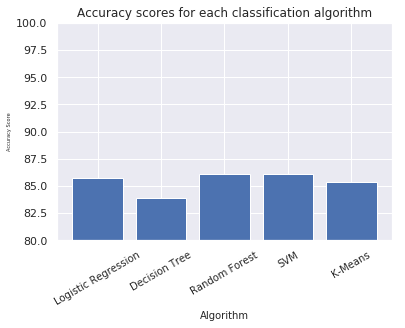

In [35]:
scores = [accuracy_score_lr,accuracy_score_dtree,accuracy_score_rf,accuracy_score_svm,accuracy_score_knn]
scores = [i*100 for i in scores]
algorithm  = ['Logistic Regression','Decision Tree','Random Forest','SVM', 'K-Means']
index = np.arange(len(algorithm))
plt.bar(index, scores)
plt.xlabel('Algorithm', fontsize=10)
plt.ylabel('Accuracy Score', fontsize=5)
plt.xticks(index, algorithm, fontsize=10, rotation=30)
plt.title('Accuracy scores for each classification algorithm')
plt.ylim(80,100)
plt.show()    

Based on the above graph, Random Forest and SVM shows the highest accuracy score.

We now calculate feature importances for RandomForest Classifier

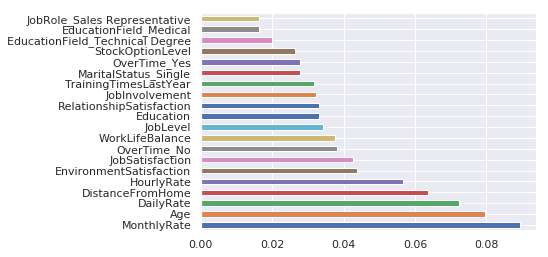

In [36]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances = feat_importances.nlargest(20)
feat_importances.plot(kind='barh')
plt.show()

Findings : Monthly Rate affects the Attrition the most